# Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('Hours-Data.txt')

# DispLaying The Dataset 

In [9]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [5]:
df.columns


Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.shape

(25, 2)

In [9]:
def null_detection(df):
    num_cols = []
    
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    print(count)
    return df


# Outlier Removal

In [10]:
df = null_detection(df)

0


# Visualizing the Dataset

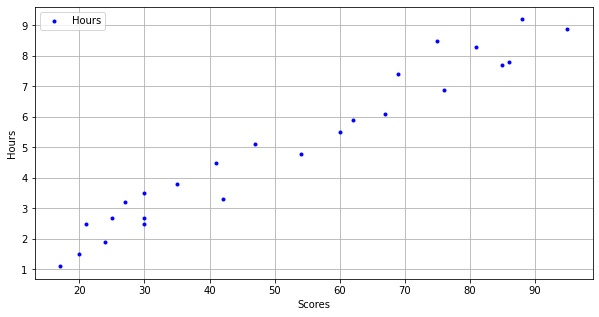

In [11]:
plt.rcParams["figure.figsize"] = [10,5]
df.plot(kind='line', x='Scores', y='Hours',style='.',color='blue',)
plt.xlabel('Scores')
plt.ylabel('Hours')

plt.grid()
plt.show()


In [12]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [13]:
df.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


# Data Preparation

In [14]:
X = df.iloc[:, :1].values
Y = df.iloc[:, 1:].values


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , Y_train)


LinearRegression()

# Visualizing the Model

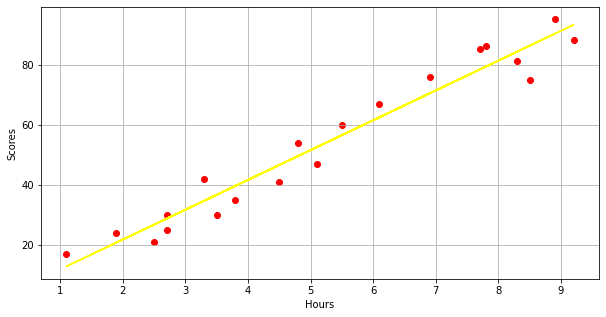

In [24]:
line = model.coef_*X + model.intercept_

plt.rcParams["figure.figsize"] = [10,5]
plt.scatter(X_train , Y_train,color= 'red')
plt.plot(X, line , color= 'yellow');
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.grid()
plt.show()


# Making Predictions

In [17]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [19]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [20]:
comp= pd.DataFrame({'Actual':[Y_test],'Predictd':[y_pred]})
comp


,Actual,Predictd
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [21]:
hours = 8.69
my_pred = model.predict([[hours]])
print("The predicted score if a person sudies for", hours, "hours is", my_pred[0])


The predicted score if a person sudies for 8.69 hours is [88.14176486]


In [22]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))


Mean Absolute Error: 4.183859899002975
